In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [27]:
df = pd.read_csv("Country-data.csv")   # Make sure the CSV is in the same folder
print("\n--- Basic Info ---")
print(df.info())
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Summary Statistics ---")
print(df.describe())

print("\nMissing values:\n", df.isnull().sum())




--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None

--- First 5 Rows ---
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3    

In [38]:
# 2️⃣ Identify categorical and numeric columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()
print("\nCategorical columns:", cat_cols)
print("Numeric columns:", num_cols)

# 3️⃣ Convert categorical → numeric (Label Encoding for simplicity)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 4️⃣ Verify conversion
print("\nAfter encoding categorical columns:")
print(df.head())



Categorical columns: []
Numeric columns: ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

After encoding categorical columns:
   country  child_mort  exports  health  imports  income  inflation  \
0        0        90.2     10.0    7.58     44.9    1610       9.44   
1        1        16.6     28.0    6.55     48.6    9930       4.49   
2        2        27.3     38.4    4.17     31.4   12900      16.10   
3        3       119.0     62.3    2.85     42.9    5900      22.40   
4        4        10.3     45.5    6.03     58.9   19100       1.44   

   life_expec  total_fer   gdpp  
0        56.2       5.82    553  
1        76.3       1.65   4090  
2        76.5       2.89   4460  
3        60.1       6.16   3530  
4        76.8       2.13  12200  



--- Skewness Before Transformation ---
country       0.000000
child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64


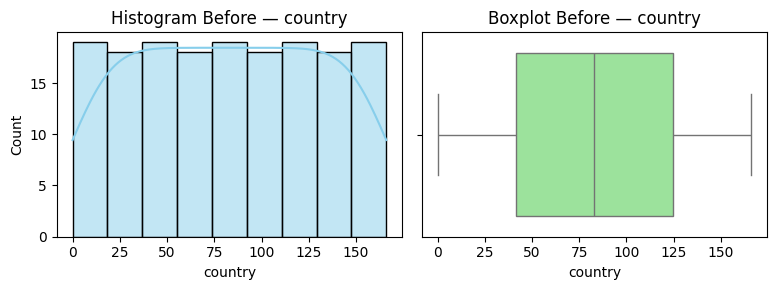

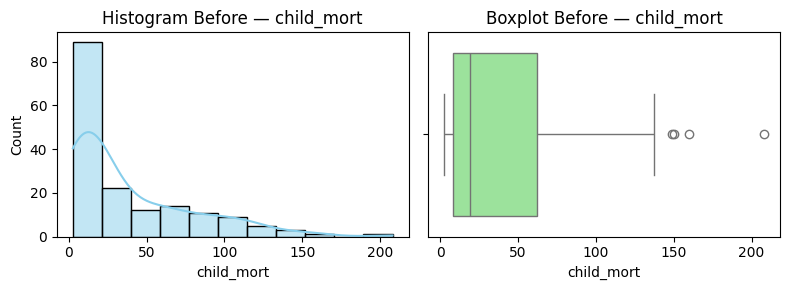

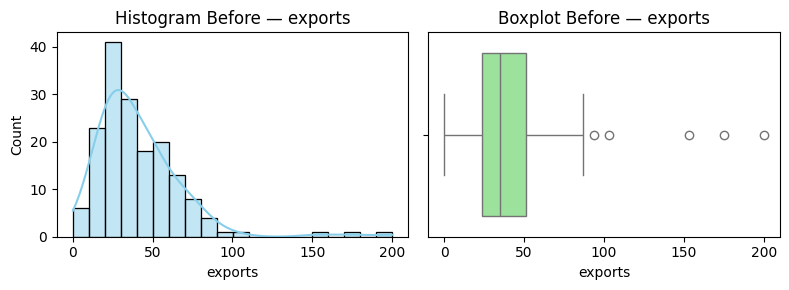

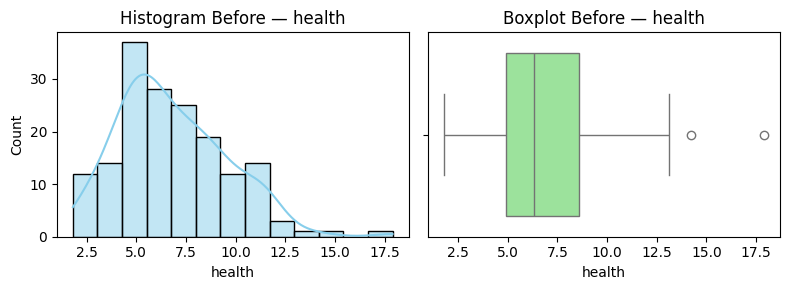

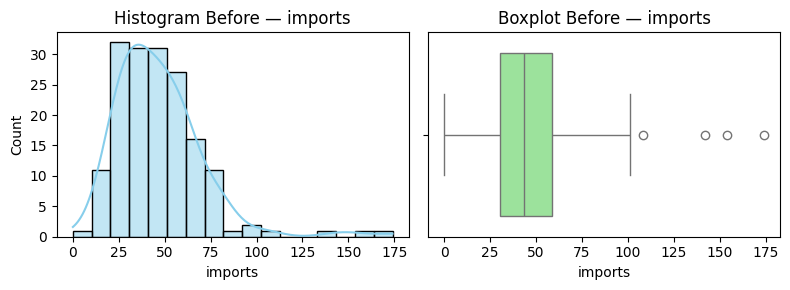

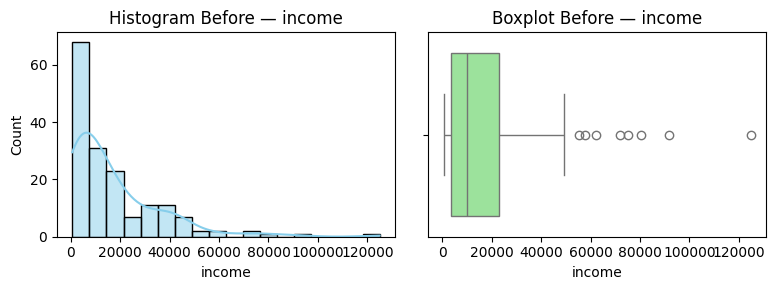

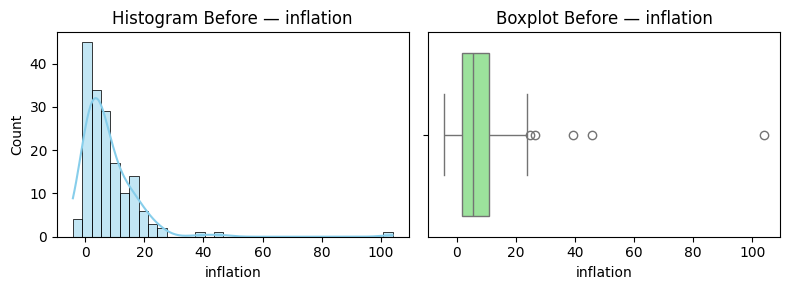

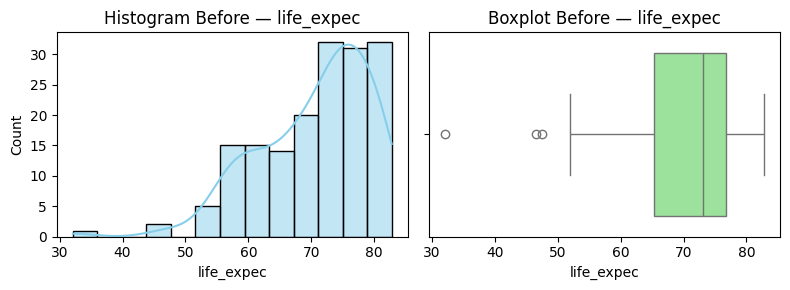

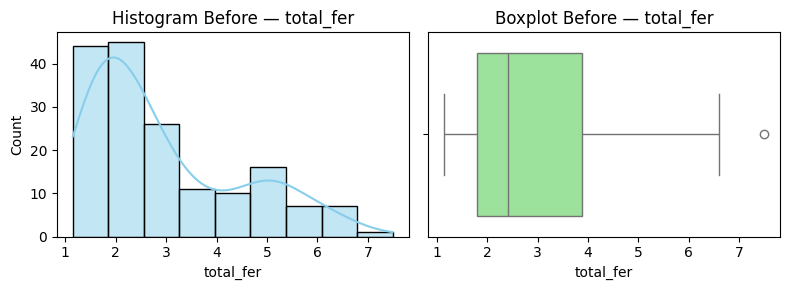

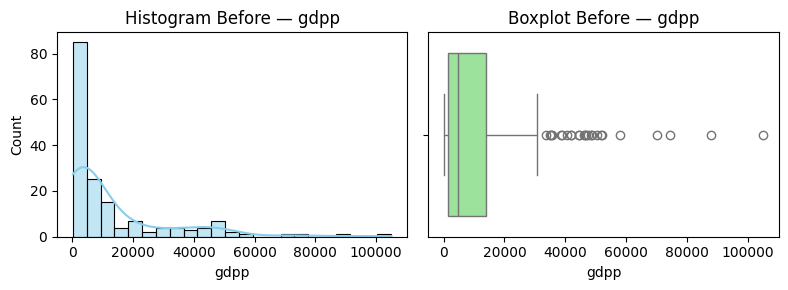


--- Skewness After Transformation ---
country      -0.280212
child_mort    0.015754
exports       0.100036
health       -0.008501
imports       0.165346
income       -0.035867
inflation     0.182506
life_expec   -0.184956
total_fer     0.136536
gdpp          0.001120
dtype: float64


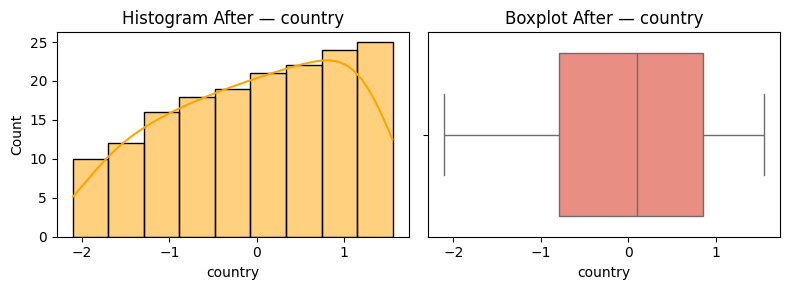

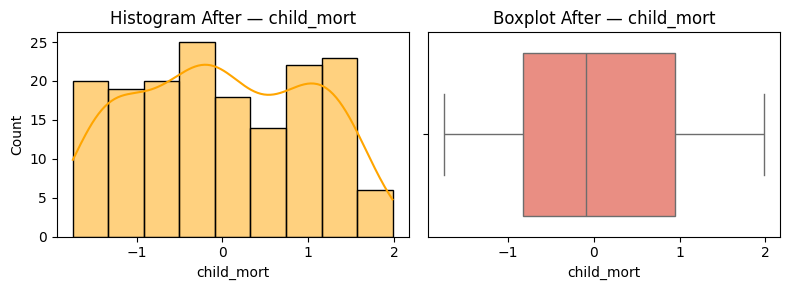

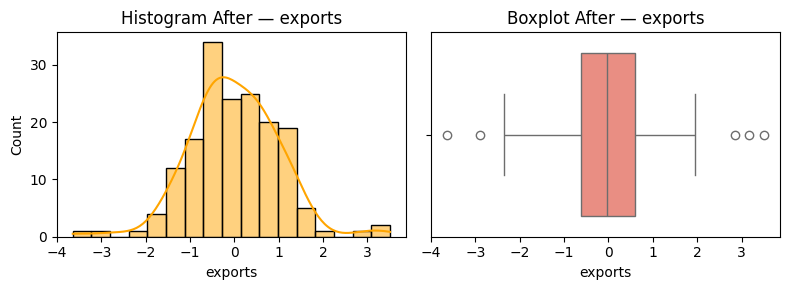

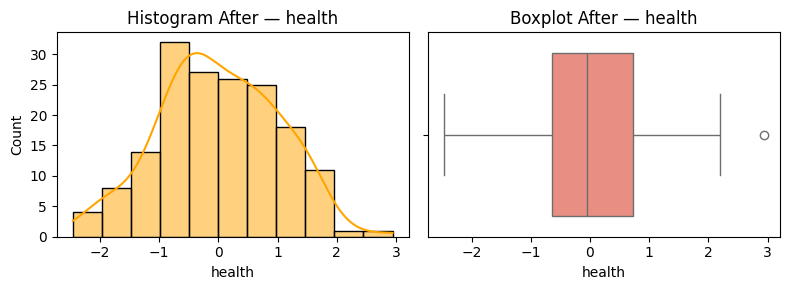

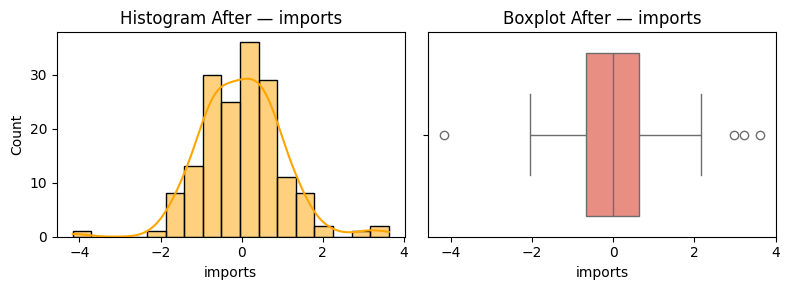

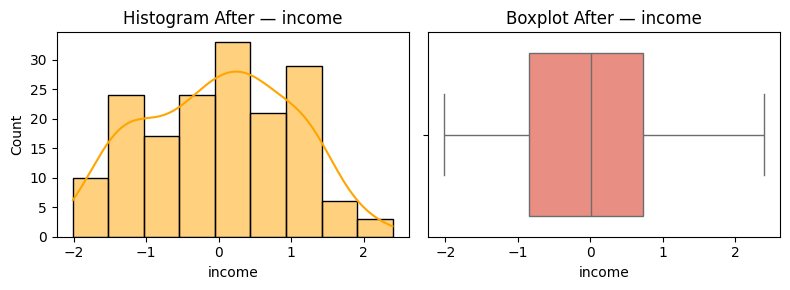

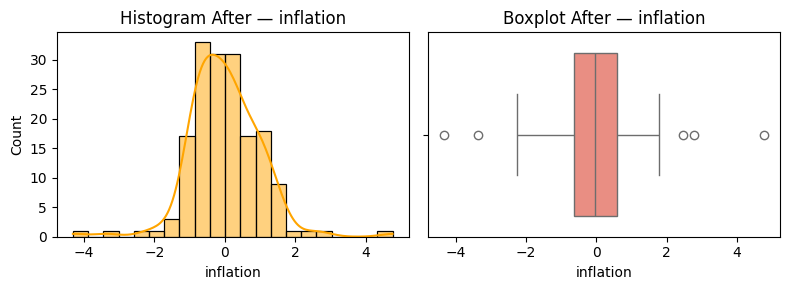

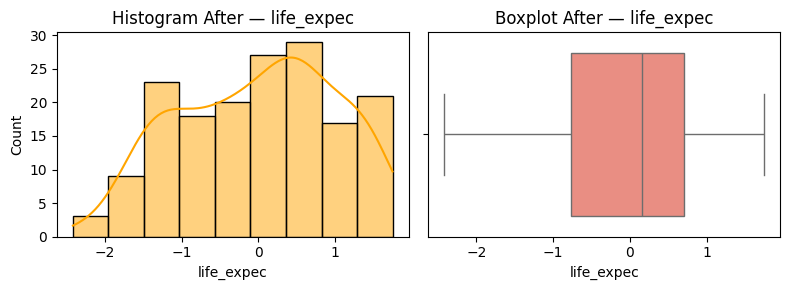

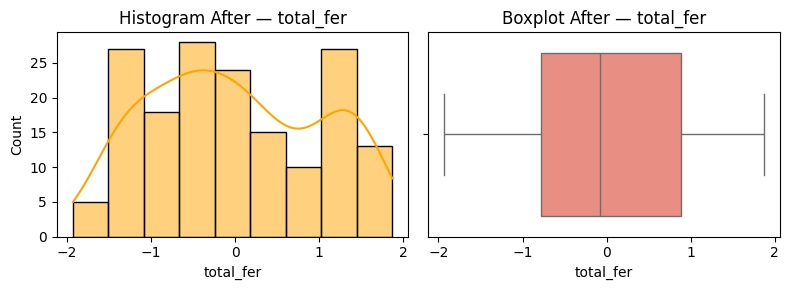

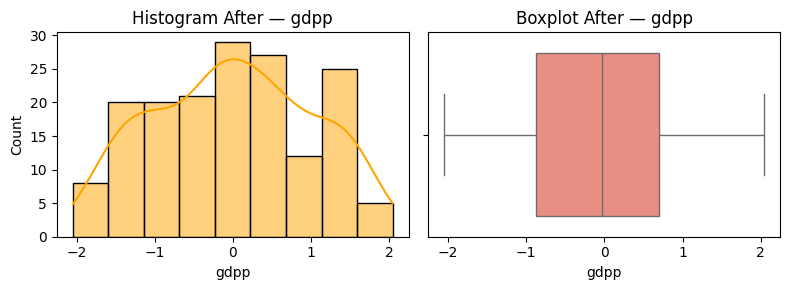


--- Skewness Comparison ---
      Feature  Skewness_Before  Skewness_After
0     country         0.000000       -0.280212
1  child_mort         1.450774        0.015754
2     exports         2.445824        0.100036
3      health         0.705746       -0.008501
4     imports         1.905276        0.165346
5      income         2.231480       -0.035867
6   inflation         5.154049        0.182506
7  life_expec        -0.970996       -0.184956
8   total_fer         0.967092        0.136536
9        gdpp         2.218051        0.001120


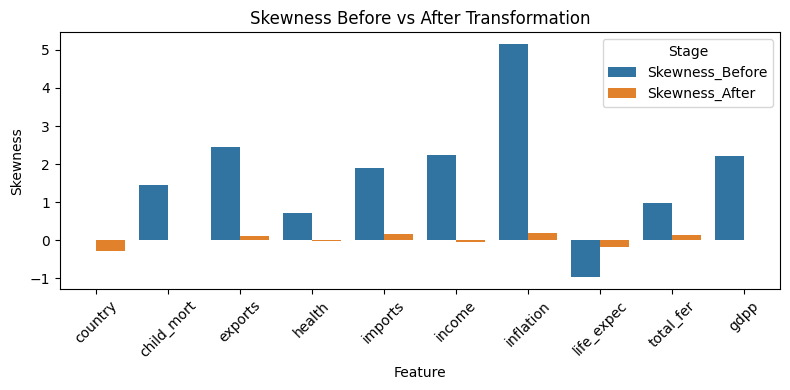

In [39]:
numeric_df = df.select_dtypes(include=['number']).copy()
# 5️⃣ Check skewness before transformation
print("\n--- Skewness Before Transformation ---")
skew_before = numeric_df.skew()
print(skew_before)

# 6️⃣ Plot histograms and boxplots before transformation
for col in numeric_df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    sns.histplot(numeric_df[col], kde=True, ax=ax[0], color='skyblue')
    ax[0].set_title(f"Histogram Before — {col}")
    sns.boxplot(x=numeric_df[col], ax=ax[1], color='lightgreen')
    ax[1].set_title(f"Boxplot Before — {col}")
    plt.tight_layout()
    plt.show()

# 7️⃣ Apply Power Transformation (similar to Box-Cox, works even with zeros)
pt = PowerTransformer(method='yeo-johnson')  # handles positive/negative
numeric_trans = pd.DataFrame(pt.fit_transform(numeric_df), columns=numeric_df.columns)

# 8️⃣ Check skewness after transformation
print("\n--- Skewness After Transformation ---")
skew_after = numeric_trans.skew()
print(skew_after)

# 9️⃣ Plot histograms and boxplots after transformation
for col in numeric_trans.columns:
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    sns.histplot(numeric_trans[col], kde=True, ax=ax[0], color='orange')
    ax[0].set_title(f"Histogram After — {col}")
    sns.boxplot(x=numeric_trans[col], ax=ax[1], color='salmon')
    ax[1].set_title(f"Boxplot After — {col}")
    plt.tight_layout()
    plt.show()

# 🔟 Compare skewness before vs after
skew_compare = pd.DataFrame({
    "Feature": numeric_df.columns,
    "Skewness_Before": skew_before.values,
    "Skewness_After": skew_after.values
})
print("\n--- Skewness Comparison ---")
print(skew_compare)

# 📊 Optional: Visual Comparison Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=skew_compare.melt(id_vars="Feature", var_name="Stage", value_name="Skewness"),
            x="Feature", y="Skewness", hue="Stage")
plt.title("Skewness Before vs After Transformation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

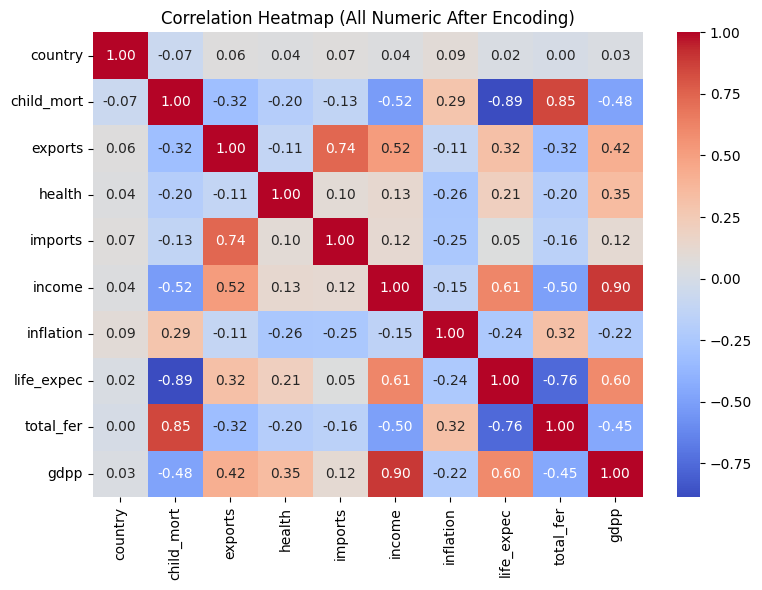

In [29]:
# 5️⃣ Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (All Numeric After Encoding)")
plt.tight_layout()
plt.show()



In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle
# Choose target variable
target_col = 'income'
X = df.drop(target_col, axis=1)
y = df[target_col]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("✅ Model Trained Successfully!")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")


✅ Model Trained Successfully!
R² Score: 0.946
MAE: 2437.023
MSE: 17913910.649


In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(df)


In [31]:
models = {
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.7, min_samples=4)
}

# 8️⃣ Evaluate models
results = []
for name, model in models.items():
    labels = model.fit_predict(X)

    if len(set(labels)) <= 1:
        sil, dbi, chi = float('nan'), float('nan'), float('nan')
    else:
        sil = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
        chi = calinski_harabasz_score(X, labels)

    results.append({
        "Model": name,
        "Silhouette": sil,
        "Davies-Bouldin (lower better)": dbi,
        "Calinski-Harabasz (higher better)": chi,
        "Num_Clusters": len(set(labels))
    })

In [32]:
results_df = pd.DataFrame(results)
print("\n--- Clustering Evaluation Metrics ---")
print(results_df)

# 🔟 Find best model
best_model = results_df.loc[results_df['Silhouette'].idxmax(), 'Model']
print(f"\n✅ Best clustering algorithm based on Silhouette Score: {best_model}")



--- Clustering Evaluation Metrics ---
           Model  Silhouette  Davies-Bouldin (lower better)  \
0         KMeans    0.240437                       1.447525   
1  Agglomerative    0.246167                       1.461998   
2         DBSCAN         NaN                            NaN   

   Calinski-Harabasz (higher better)  Num_Clusters  
0                          55.207333             3  
1                          48.429653             3  
2                                NaN             1  

✅ Best clustering algorithm based on Silhouette Score: Agglomerative


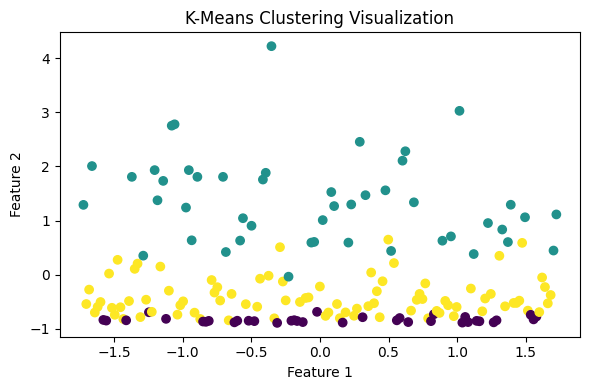

In [33]:
#  Visualize clusters for K-Means (first 2 features)
kmeans = models['KMeans']
labels = kmeans.fit_predict(X)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("K-Means Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()